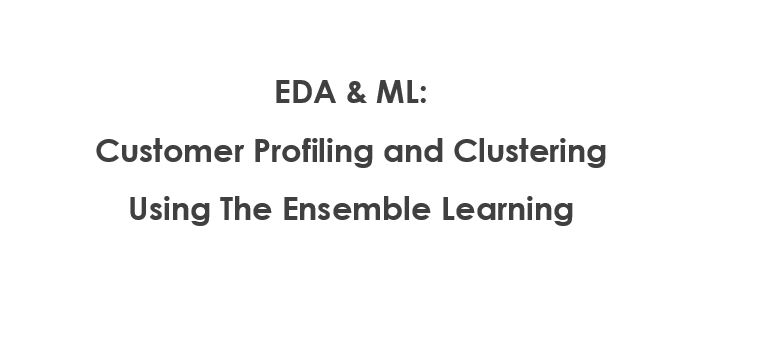

In [3]:
from IPython.display import Image
Image("../title.png")

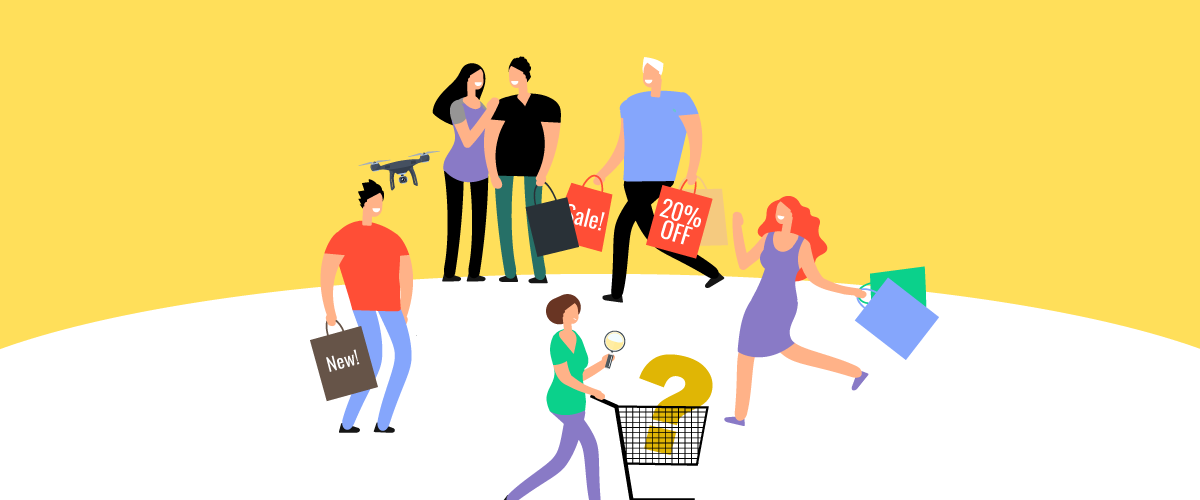

In [4]:
Image("../c1.png")

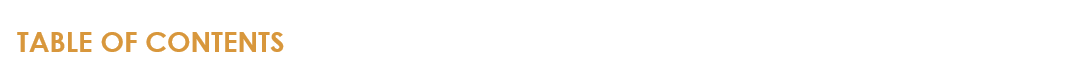

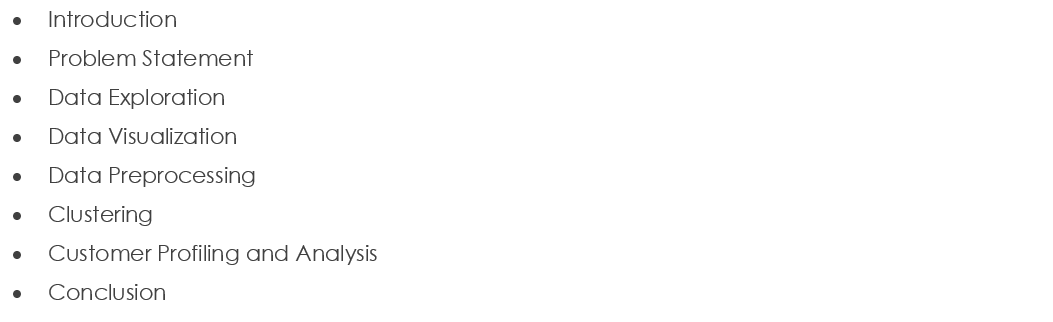

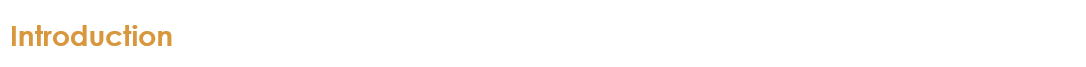

As in any industry, the first step for a business to succeed is to get customers who generate a profit, which means figuring out what makes customers profitable. Not to mention that the process of doing business nowadays extends far beyond waiting in a store for an item to be sold, as customer needs and habits change daily, as do the types of products. 

To address this issue, we employ machine learning algorithms to learn more about consumers and their demands. By analyzing a customer's behavior, it can predict their needs. as it is imperative that segmentation is used to develop customer service strategies that, in turn, will increase customer satisfaction.

As a marketing terms, "segmentation refers" to the division of a market into distinct groups of customers, each with differentiated needs, characteristics, and behaviors, possibly needing different products, or responding differently to different marketing efforts. In order to segment effectively, each segment must be evaluated based on certain criteria.

Since in the busniess world, companies have a limted resources, they have to focus on customer identification and service. In view of this, segmentation can be considered an integral part of defining marketing objectives that may include:
* Based on a detailed analysis of current customer segments, an analysis is conducted to determine how to sell or develop products
* New segments are identified as potential targets for existing products or for new products to be developed.

In this notebook, while Data Science helps companies in understanding these pattern, we'll look at how the segments are different in terms of KPIs or variables

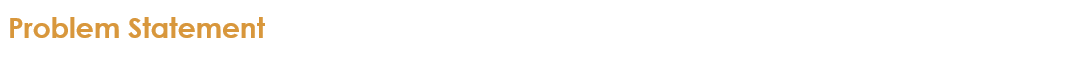

The first step to a company's success should be planning and implementing a profitable marketing approach. To achieve that, the company started thinking about modeling and profiling before segmentation. As in this notebook, as a data scientist, I will use the data to explore it and start to do profiling for the company to provide a description or profile of a group of prospects or potential customers and use distinct sections of the dataset as segments that help the managers and other departments identify characteristics that are important to them in their business decisions and to the success of their company. 

By using ensemble learning and unsupervised machine learning algorithms, the company can find out which group of customers probably will make the purchase, and then focus on marketing to them directly in addition to gaining valuable insights.

**Note: The dataset was directly obtained from Kaggle :**
 

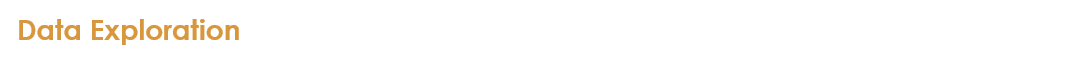

In order to begin exploring the data, we will import the important libraries that will assist in future analysis and problem-solving for the existing problem.

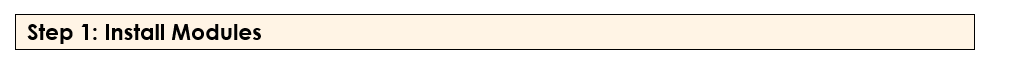

This data exploration will make use of the following libraries; their installation is required to run the codes and function properly.

Start installing the following:

1. **`sidetable Python Library:`** Permits the utilization of a wide range of helpful tools exploratory data analysis methods on the dataset.

2. **`visualpython Python Library:`** Enables the creation of 3D objects visualization.

3. **`yellowbrick Python Library:`** Assist in evaluating the performance, predictability, and stability of machine learning models


In [10]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install visualpython

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "4" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "6" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "6" # export NUMEXPR_NUM_THREADS=6

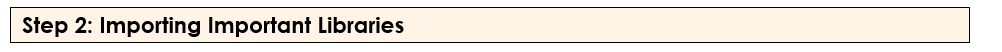

To describe and explore the data from various perspectives, we will import the most important libraries and some functions:

1.**`Pandas`:** Analyzes and manipulates data. 

2.**`Numpy`:** Contributes to the execution of a wide range of mathematical operations on numerical arrays contained within the dataset.

3.**`Sklearn`:** This will affect our machine learning models because it will give us more flexibility in how we apply various model-based operations.

4.**`matplotlib, seaborn`:** Display outcomes.

5.**`mpl_toolkits`:** Visualization in three dimensions

6.**`Sidetable`:** Present a brief summary of the results 

7.**`Warning`:** To manage the warnings. 

8.**`Seaborn`,`matplotlib`,`plotly`,  :** For data visualization.

9.**`scipy`:** A library for scientific computing with all the necessary algebraic functions.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import sidetable as stb

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.cluster.hierarchy as shc
import plotly.express as px

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.mixture import GaussianMixture
from scipy.stats import skew, kurtosis

from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from numpy import unique

import warnings
warnings.filterwarnings('ignore')

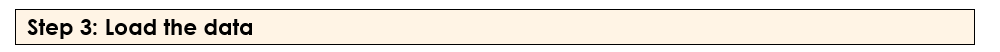

Start by openning and readingthe desired `CSV file` along with the directory of the dataset.

In order to make the dataset easily accessible and understandable, the data will be imported as a `CSV file` into the system as a data frame.

Below are the basic operations that must be performed to determine what type of data we have.

* **`Head of the first five rows of the dataset.`**

* **`Shape of the columns and rows numbers of the data.`**

* **`Extra information of the dataset.`**

* **`Brief overview of the whole data set.`**

In [14]:
cust_df = pd.read_csv("../../datasets/marketing_campaign11.csv")

Obtain an overview of the selected dataset.

In [15]:
cust_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Run the following command to check the dimension of the dataset:

In [16]:
print("Data set's rows", cust_df.shape[0])
print("data set's columns:", cust_df.shape[1])


Data set's rows 2240
data set's columns: 29


There are `2240 rows` in total, and `29 columns` containing a wide variety of data types. 

The `'dtypes'` attribute will be used to verify the data types of each column since it cannot be guaranteed all data was loaded into the correct data types.

In [17]:
cust_df.dtypes


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

**Insights:**
 
As seen in the output, we have obtained the data types for dataset columns and that not all of the columns have the correct data type like `Dt_Customer`. So some changes needs to be implemented. 

Get a summary of the DataFrame:

In [18]:
cust_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations**

1. As can be observed, there are a few missing values in the dataset. with **3 categorical data** and **26 numerical data** with 1 value as `float` and 25 values as `integers`.

2. The columns of the data frame consume more than 507,6 KB of total memory.

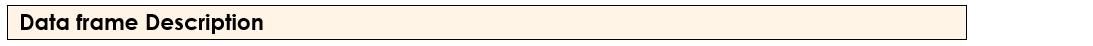


__<font size="3"><center> People</font><center>__

|Attribute Name|Description| | |
|------|------|------|------|
|__ID:__ | Unique identifier as a reference number for customer|   |  |
|__Year_Birth__|Customer's birth year|  |   |
|__Marital_Status__|Marital status for the customer | |  |
|__Education__|Customer education level | |  |
|__Complain__| Complaints done by customers, 1 if a customer has made a complaint in the last two years, otherwise 0 | |  |
|__Dt_Customer__| The date on which the customer first became a member of the company| |   |
|__Recency__|Customer last purchase date in days| |   |
|__Teenhome__|Customer household number of teenagers| |  |
|__Kidhome__ |Household size by number of children| | |
|__Income__  |Income of a customer per year| |   |


__<font size="3"><center> Promotion</font><center>__

|Attribute Name|Description| | |
|------|------|------|------|
|__Response__ | Response to the company offers, 1 if customer accepted the offer, 0 otherwise|   |  |
|__AcceptedCmp1__|Customer offers acceptance in the 1st campaign, 1 accepted, 0 otherwise|  |   |
|__AcceptedCmp2__|Customer offers acceptance in the 2nd campaign, 1 accepted, 0 otherwise| |  |
|__AcceptedCmp3__|Customer offers acceptance in the 3d campaign, 1 accepted, 0 otherwise | |  |
|__AcceptedCmp4__|Customer offers acceptance in the 4th campaign, 1 accepted, 0 otherwise| |  |
|__AcceptedCmp5__|Customer offers acceptance in the 5th campaign, 1 accepted, 0 otherwise | |   |
|__NumDealsPurchases__|Discounted purchases| |   |


__<font size="3"><center> Products</font><center>__

|Attribute Name|Description| | |
|------|------|------|------|
|__MntFruits__ | Last two years' fruits spending|   |  |
|__MntGoldProds__|Last two years' gold spending|  |   |
|__MntFishProducts__|Last two years' fish spending| |  |
|__MntMeatProducts__|Last two years' meat spending | |  |
|__MntSweetProducts__|Last two years' sweets spending| |  |
|__MntWines__|Last two years' wine spending| |   |


__<font size="3"><center> Purchace Place </font><center>__

|Attribute Name|Description| | |
|------|------|------|------|
|__NumWebVisitsMonth__ |Last month's web site visits|   |  |
|__NumCatalogPurchases:__|How much was bought through catalogs|  |   |
|__NumWebPurchases__|Website sales for the company| |  |
|__NumStorePurchases__|Amount of direct store purchases| |  |


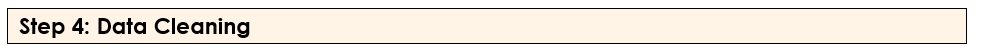

This step involves creating new columns and editing the wrong data type features. 

`"Dt Customer"` is contained within an object type, where it should be converted to `DateTime` format. 
To obtain the date and time conversion, execute the command below.

In [19]:
cust_df["Dt_Customer"] = pd.to_datetime(cust_df["Dt_Customer"])


In [20]:
cust_df["Dt_Customer"]


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

Add the column `Age` in our dataframe to find out how old each customer by using `Dt customer` and calculate its maximum value to extract the customer's age.

In [21]:
cust_df["Dt_Customer"].max()


Timestamp('2014-12-06 00:00:00')

The date `December 6th of the year 2014` is the most recent entry in our records.

In [22]:
cust_df["Age"] = 2014 - cust_df["Year_Birth"]

cust_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   57  
1         11         0   60  
2         11         0   49  
3         11         0   30  
4         11         0   33  

[5 rows x 30 columns]

Display the unique value of the added feature.

In [23]:
cust_df["Age"].unique()


array([ 57,  60,  49,  30,  33,  47,  43,  29,  40,  64,  31,  38,  55,
        62,  27,  68,  34,  65,  32,  35,  63,  45,  28,  25,  51,  44,
        41,  71,  39,  18,  46,  50,  37,  36,  59,  48,  26,  66,  56,
        42,  54,  69,  23,  52,  61,  53,  58,  22, 114, 121,  24,  67,
       115,  21,  20,  73,  70,  19,  74])

As displayed in the output, age values vary from a young age to an old age.

Explore `Education` feature by printing its unique values.

In [24]:
cust_df["Education"].unique()


array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

There are five distinct values for the `Education` feature, which can be grouped into three categories.
`Graduate / Postgraduate / Undegraduate` by using `replace` method.

In [25]:
cust_df["Education"] = cust_df["Education"].replace(
    {
        "Graduation": "Graduate",
        "PhD": "Postgraduate",
        "Master": "Postgraduate",
        "Basic": "Undergraduate",
        "2n Cycle": "Postgraduate",
    }
)


In [26]:
cust_df["Marital_Status"].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

As `Marital Status` feature has 8 unique values. It is preferable to classify them into two values where possible. `Partners / Single`

In [27]:
cust_df["Marital_Status"] = cust_df["Marital_Status"].replace(
    {
        "Single": "Single",
        "Together": "Partner",
        "Married": "Partner",
        "Divorced": "Single",
        "Widow": "Single",
        "Absurd": "Single",
        "YOLO": "Single",
    }
)

cust_df.head()


ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate        Partner  71613.0        0         0   
3  6182        1984      Graduate        Partner  26646.0        1         0   
4  5324        1981  Postgraduate        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   57  
1         11         0   60  
2         11         0   49  
3         11         0   30  
4         11         0   33  

[5 rows x 30 columns]

It would be better to combine `"Kidhome"` and `"Teenhome"` columns into one column called `"No. of children."`

In [28]:
cust_df["No. of children"] = cust_df["Kidhome"] + cust_df["Teenhome"]


Using the `lambda` function, extract the day, month, and year features from the `Dt Customer` feature and add the feature `Is_parent` by the use of another build-in functions `(day, month and year)`.

In [29]:
cust_df["Day"] = cust_df["Dt_Customer"].apply(lambda d: d.day)
cust_df["Month"] = cust_df["Dt_Customer"].apply(lambda m: m.month)
cust_df["Year"] = cust_df["Dt_Customer"].apply(lambda y: y.year)


In [30]:
cust_df["Is_Parent"] = cust_df["No. of children"].apply(lambda p: 1 if p != 0 else 0)


Drop unnecessary columns and set the axis to 1 to drop the whole column in the orginal data frame by setting the `inplace` to `True`.

In [31]:
cust_df.drop(
    ["Dt_Customer", "Year_Birth", "Z_CostContact", "Z_Revenue", "No. of children"],
    axis=1,
    inplace=True,
)


In [32]:
cust_df.shape


(2240, 30)

Rename some columns 

In [33]:
cust_df.rename(
    columns={
        "NumWebPurchases": "Web_Purchase",
        "NumCatalogPurchases": "Catalog_Purchase",
        "NumStorePurchases": "Store_Purchase",
    },
    inplace=True,
)


Add `Total_Expenses` and `Total Accepted Campaigns` features for future analysis.

In [34]:
cust_df["Total_Expenses"] = (
    cust_df["MntWines"]
    + cust_df["MntFruits"]
    + cust_df["MntMeatProducts"]
    + cust_df["MntFishProducts"]
    + cust_df["MntSweetProducts"]
    + cust_df["MntGoldProds"]
)


In [35]:
cust_df["Total_Acc_Cmp"] = (
    cust_df["AcceptedCmp1"]
    + cust_df["AcceptedCmp2"]
    + cust_df["AcceptedCmp3"]
    + cust_df["AcceptedCmp4"]
    + cust_df["AcceptedCmp5"]
    + cust_df["Response"]
)


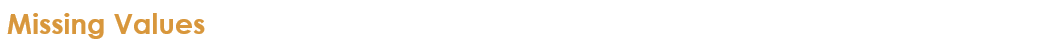

Before starting the data preprocessing, it's good to look into missing values that could be in our data and the type of these missing values to know what the best procedure is to deal with them. 

As missing values can occur when the user forgets to fill the cells or data is lost while transferring into the database, Let use `isnull.sum()` for checking as follows:

In [36]:
print("Missing values: {}\n".format(cust_df.isnull().sum().sum()))


Missing values: 24



Clearly, there is **`24 missing values`**.

Utilize sidetable methods by using the `.stb accessor` and run the following code to return an ordering data frame of missing values by column, from most to least. In addition, each column also shows the percentage of missing values and the total number of rows.

In [37]:
cust_df.stb.missing(style=True)


**Insigts**

* There are `twenty-four` empty cells in the `'Income'` column with a percentage of `1.07%`.
* Impute the missing values by take the `mean.`

In [38]:
cust_df["Income"].fillna(cust_df["Income"].mean(), inplace=True)


In [39]:
print("Missing values: {}\n".format(cust_df.isnull().sum().sum()))


Missing values: 0



Double check, `0 missing values are in the data frame.`
Missing values were handled successfully.

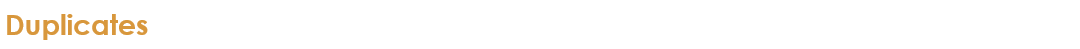

Due to the fact that having identical values throughout the dataset makes it difficult to make informed decisions, finding duplicate values and dealing with them is crucial. This emphasizes the significance of counting the number of duplicates and getting rid of them, whether by keeping only the first or last record or none at all.

* To determine how many rows are duplicated in the data frame, use the `'.duplicated()'` function.

In [40]:
print("Rows with a duplicate value:{}".format(cust_df.duplicated().sum()))


Rows with a duplicate value:0


Fortunately, the data frame contained no duplicates. 

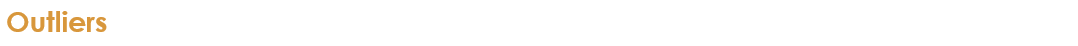

Points that stand out significantly from the rest of the dataset are called outliers. Multiple factors, such as mathematical mistakes, could lead to their appearance. However, while outliers should always be identified and managed, in some situations they can be safely ignored.

Identify outliers within a data frame as following:

* **Visualise outliers.**

* **Define a function to identify data outliers..**

* **Implement some strategies for handling the outliers, either by getting rid of them or accepting them as part of the data.**

Have a look at the statistical data of the numerical values

In [41]:
cust_df.describe().T


count          mean           std     min       25%  \
ID                 2240.0   5592.159821   3246.662198     0.0   2828.25   
Income             2240.0  52247.251354  25037.797168  1730.0  35538.75   
Kidhome            2240.0      0.444196      0.538398     0.0      0.00   
Teenhome           2240.0      0.506250      0.544538     0.0      0.00   
Recency            2240.0     49.109375     28.962453     0.0     24.00   
MntWines           2240.0    303.935714    336.597393     0.0     23.75   
MntFruits          2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts    2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts    2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts   2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds       2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases  2240.0      2.325000      1.932238     0.0      1.00   
Web_Purchase       2240.0      4.084821      2.778714     0.0      2.00   
Catalog_Purchase   2240.0      2.662054      2.923101     0.0      0.00   
Store_Purchase     2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth  2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3       2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4       2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5       2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1       2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2       2240.0      0.013393      0.114976     0.0      0.00   
Complain           2240.0      0.009375      0.096391     0.0      0.00   
Response           2240.0      0.149107      0.356274     0.0      0.00   
Age                2240.0     45.194196     11.984069    18.0     37.00   
Day                2240.0     15.585714      8.834884     1.0      8.00   
Month              2240.0      6.520089      3.512696     1.0      3.00   
Year               2240.0   2013.028125      0.684554  2012.0   2013.00   
Is_Parent          2240.0      0.715179      0.451430     0.0      0.00   
Total_Expenses     2240.0    605.798214    602.249288     5.0     68.75   
Total_Acc_Cmp      2240.0      0.446875      0.890543     0.0      0.00   

                       50%       75%       max  
ID                  5458.5   8427.75   11191.0  
Income             51741.5  68289.75  666666.0  
Kidhome                0.0      1.00       2.0  
Teenhome               0.0      1.00       2.0  
Recency               49.0     74.00      99.0  
MntWines             173.5    504.25    1493.0  
MntFruits              8.0     33.00     199.0  
MntMeatProducts       67.0    232.00    1725.0  
MntFishProducts       12.0     50.00     259.0  
MntSweetProducts       8.0     33.00     263.0  
MntGoldProds          24.0     56.00     362.0  
NumDealsPurchases      2.0      3.00      15.0  
Web_Purchase           4.0      6.00      27.0  
Catalog_Purchase       2.0      4.00      28.0  
Store_Purchase         5.0      8.00      13.0  
NumWebVisitsMonth      6.0      7.00      20.0  
AcceptedCmp3           0.0      0.00       1.0  
AcceptedCmp4           0.0      0.00       1.0  
AcceptedCmp5           0.0      0.00       1.0  
AcceptedCmp1           0.0      0.00       1.0  
AcceptedCmp2           0.0      0.00       1.0  
Complain               0.0      0.00       1.0  
Response               0.0      0.00       1.0  
Age                   44.0     55.00     121.0  
Day                   16.0     23.00      31.0  
Month                  6.0     10.00      12.0  
Year                2013.0   2013.00    2014.0  
Is_Parent              1.0      1.00       1.0  
Total_Expenses       396.0   1045.50    2525.0  
Total_Acc_Cmp          0.0      1.00       5.0

Observable outliers can be identified in `Income` based on the significant difference between `min value` and `max value` as well as for `Age`. 

By defining a list of the numerical columns and return the columns that have a max value greater than 30 to start detecting the upnormal outliers.

In [42]:
numerical_colms = [colms for colms in cust_df.columns if cust_df[colms].dtype != "O" and cust_df[colms].max() > 30]
numerical_colms


['ID',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Age',
 'Day',
 'Year',
 'Total_Expenses']

Visualize the distribution of points in the numerical columns to detect outliers using `seaborn library` and pass each column by its index. 

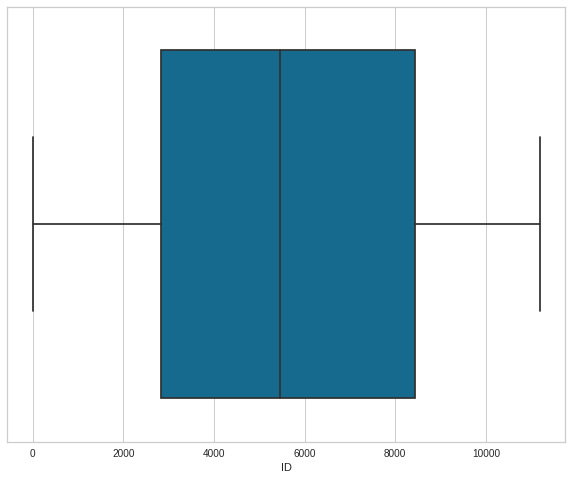

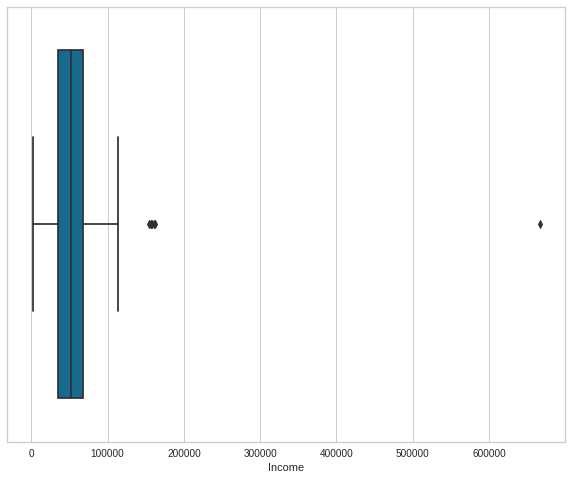

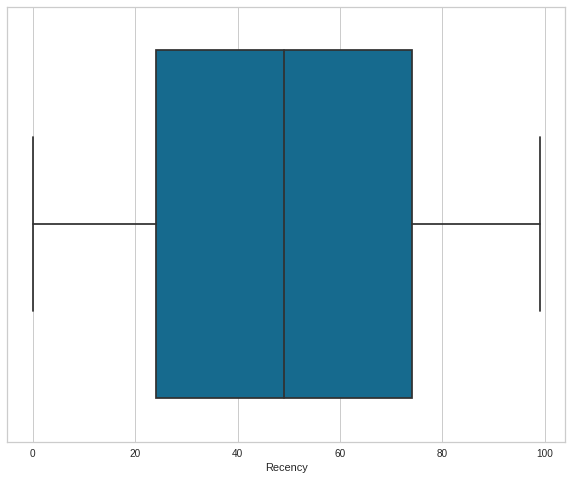

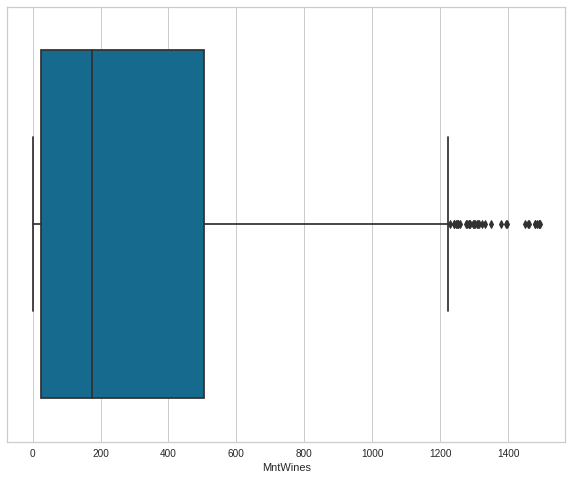

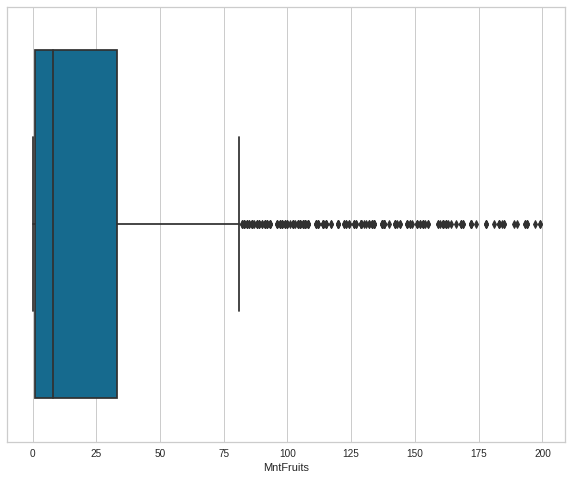

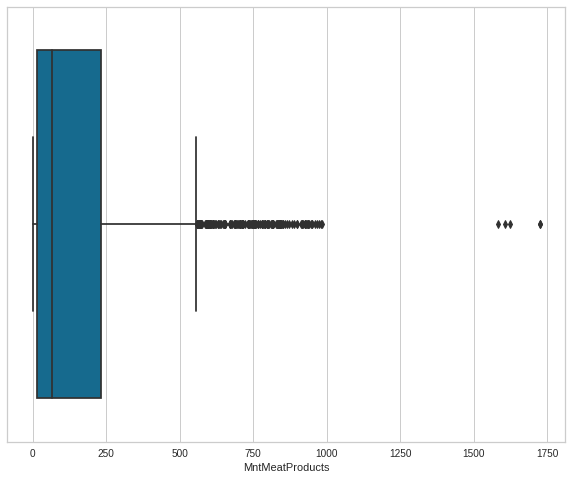

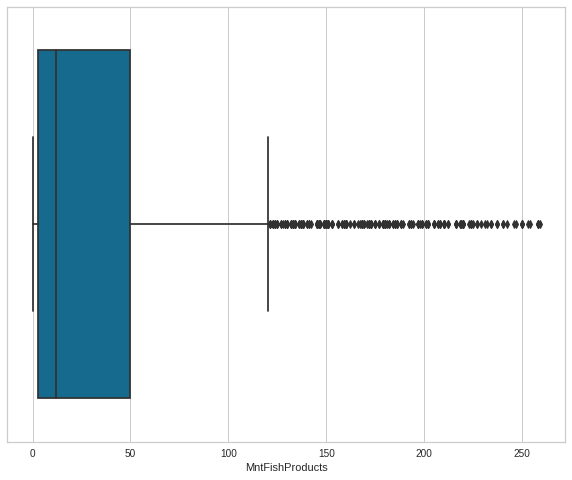

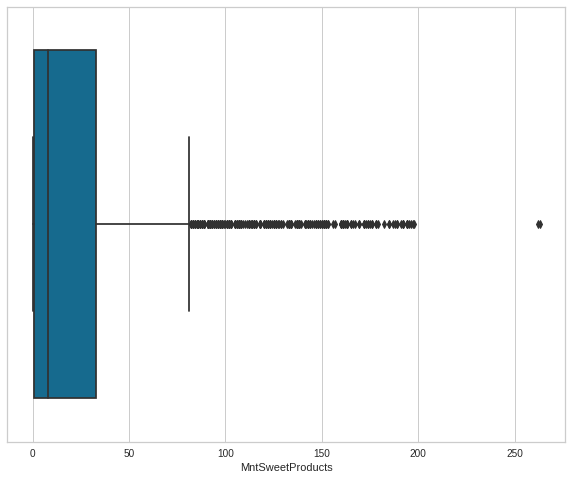

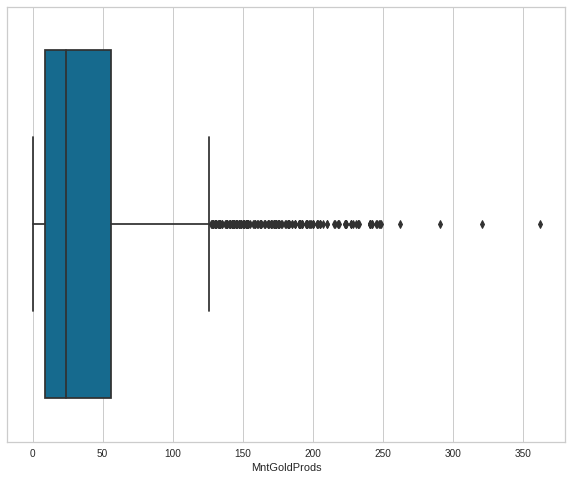

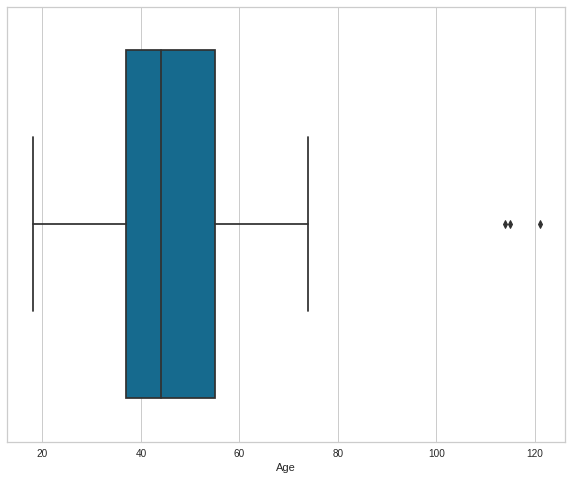

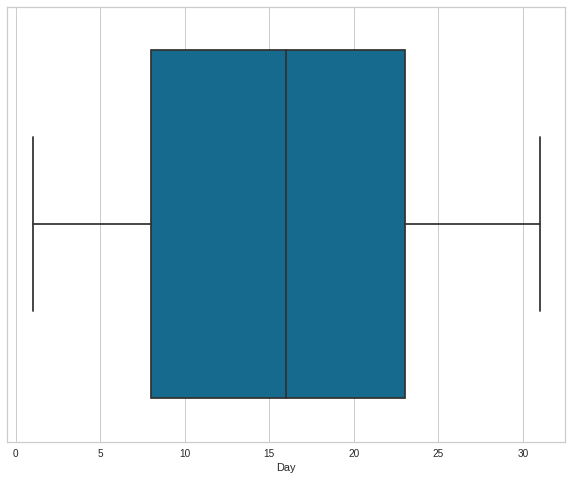

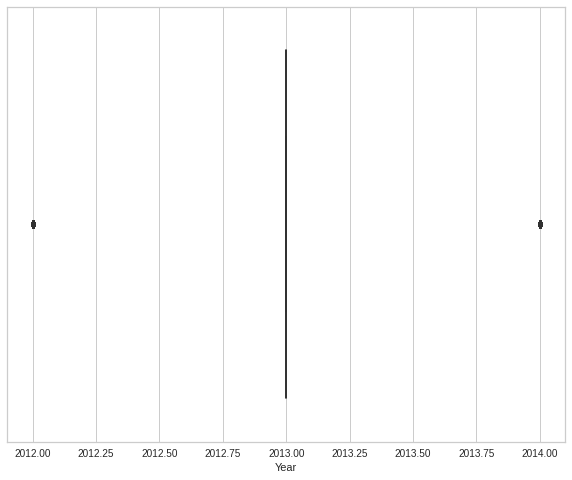

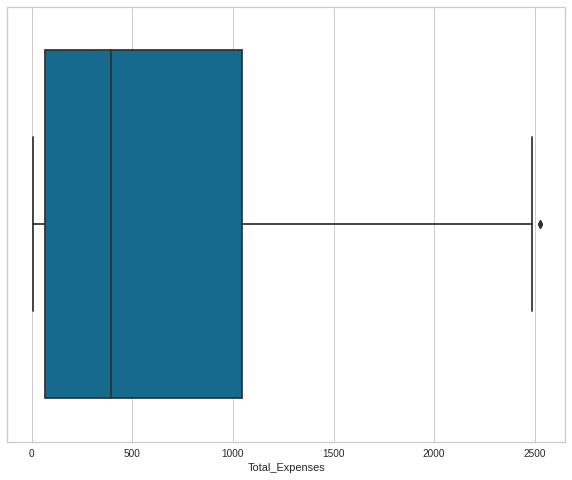

In [43]:
for i in numerical_colms:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=cust_df[i])
    plt.show()


Most of the columns have a normal distribution of points and no outliers, whereas `Age` and `Income` as can be seen, contain some maximum data points where they can be considered extreme values and can be detected as outliers. However, in some of the columns like `Gold`, `Sweets`, and `Meat` their point distribution can be ignored and not considered as extreme values. 

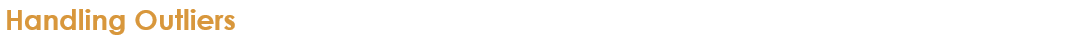

In this part, function will be defined to have a list of outlier indexes in a particular column. After that, another function will be defined in the purpose of removing the unwanted outlires. Doing so will help in gaining a deeper comprehension of the outliers.

* Define a function that takes a single input `(numerical columns)`
* Use the `np.percentile()` function to compute the first and third quartiles respectively.
* Calculates the `interquartile range (IQR)`.
* Use the calculated IQR value to compute the `lower and upper quartile` bounds for the input data `(detected outliers)`.
* The indices and values of these outliers are then returned by the function as a tuple of two lists.

In [44]:
def detect_outliers(r):
    quart1 = np.percentile(r, 25)
    quart3 = np.percentile(r, 75)
    IQR = quart3 - quart1

    lo_quart = quart1 - 1.5 * IQR
    up_quart = quart3 + 1.5 * IQR

    list_of_outliers_ = list(r.index[(r < lo_quart) | (r > up_quart)])
    outliers_val = list(r[list_of_outliers_])

    return list_of_outliers_, outliers_val


Print a list of the `outlying income,age` values in the data frame that detected by the function.

In [45]:
income_list, income_values = detect_outliers(cust_df["Income"])
print(np.sort(income_values))


[153924. 156924. 157146. 157243. 157733. 160803. 162397. 666666.]


In [46]:
Age_list, Age_values = detect_outliers(cust_df["Age"])
print(np.sort(Age_values))


[114 115 121]


From what we can see above, there are a few extreme values in these two columns. To make sense, in our case for best clustering in the coming sections, it is preferable to delete these outliers.


* Iterates over the columns `[Age] and [Income]`.
* Compute the `first and third quartiles` of the data as well as the `interquartile range (IQR)`.
* Compute the `minimum and maximum` acceptable values for the age.
* Replace any value that falls outside the bound of minimum and tha maximum values with `nan` value using `np.nan`. 

In [47]:
for age in ["Age"]:
    thd_quartile, fst_quartile = np.percentile(cust_df.loc[:, age], [75, 25])
    inter_qr = thd_quartile - fst_quartile

    max_age = thd_quartile + (1.5 * inter_qr)
    min_age = fst_quartile - (1.5 * inter_qr )

    cust_df.loc[cust_df[age] < min_age, age] = np.nan
    cust_df.loc[cust_df[age] > max_age, age] = np.nan


Drop the outliers

In [48]:
cust_df = cust_df.dropna(axis = 0)


In [49]:
cust_df['Age'].describe().T


count    2237.000000
mean       45.098346
std        11.701917
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

In [50]:
for inc in ["Income"]:
    thd_quartile, fst_quartile = np.percentile(cust_df.loc[:, inc], [75, 25])
    inter_qr = thd_quartile - fst_quartile

    max_inc = thd_quartile + (1.5 * inter_qr)
    min_inc = fst_quartile - (1.5 * inter_qr)

    cust_df.loc[cust_df[inc] < min_inc, inc] = np.nan
    cust_df.loc[cust_df[inc] > max_inc, inc] = np.nan


In [51]:
cust_df = cust_df.dropna(axis=0)


In [52]:
cust_df["Income"].describe().T

count      2229.000000
mean      51628.825945
std       20601.302353
min        1730.000000
25%       35416.000000
50%       51563.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

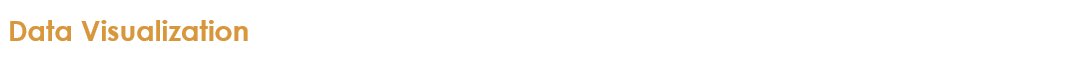

Now, we will use different Python modules for plotting data and gaining insights and correlations. use different python modules for plotting data and gain insights and correlations.

### Correlation Map 

By employing the `'heatmap'` function of `Seaborn`  and pass these parameters:

1. The results of a correlation
2. `annot:` set it to True, to display the correlation values within each cell.
3. `fmt:`Prepares the string to hold annotation values in the desired format.

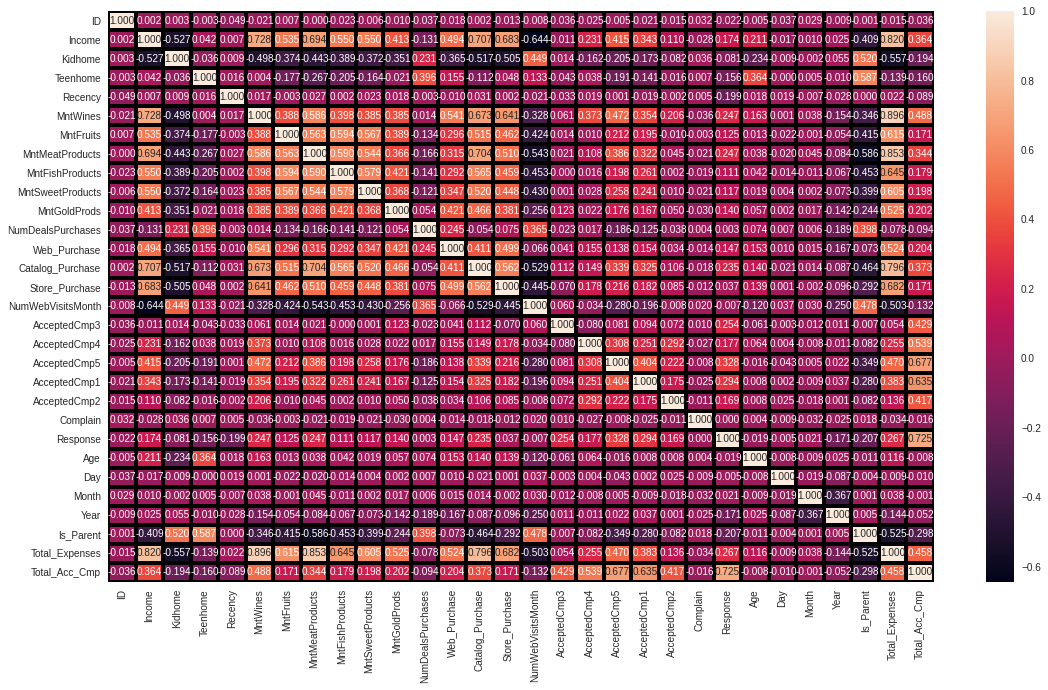

In [53]:
plt.figure(figsize=(18.5, 10.5))
sns.heatmap(
    cust_df.corr(),
    annot=True,
    linewidth=4,
    linecolor="black",
    fmt="0.3f",
    annot_kws={"size": 10},
)
plt.show()


**Insights**

* `strong positive` relationship between **income** and **total expenses** as well as with the products **meats**, **wines** and **Catalog_Purchase**.


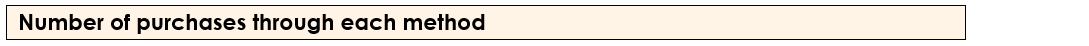

Obtaining some insights by answering a `few key questions` that may affect and be used later when continuing the work and profiling the customer following segmentation.

* Calculate the sum of purchases and sort them to analyze the number of purchases made through each method.
* Create a `sns color palette` and sets it as the background for the figure.
* Create a `pie chart` with labels with the 3 indexes and colors set to spectral from our color palette.
* Specify an `autopct="%1"` format so that we can see how much percentage of total purchases were made through each method in percentages on our pie chart.
* Using `explode=(0, 0, 0.1)` to explode the third slice as well as the first two slices will be plotted at the same distance from the center of the chart, while the third slice will be offset by 0.1.

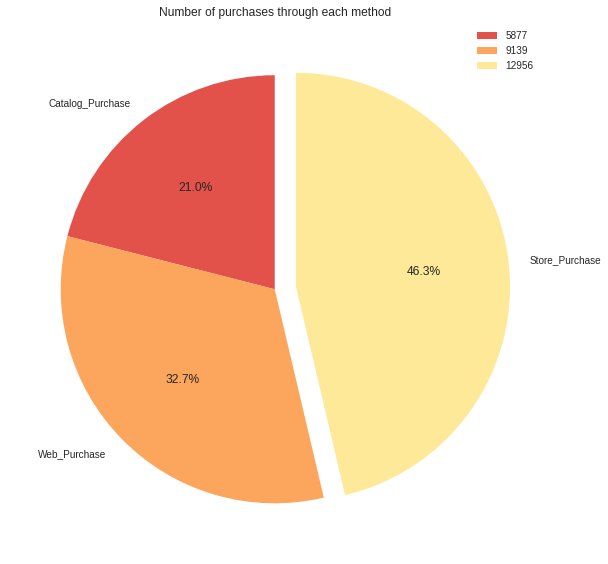

In [54]:
Purchases = (
    cust_df[["Web_Purchase", "Catalog_Purchase", "Store_Purchase"]].sum().sort_values()
)

palette = sns.color_palette("Spectral")
plt.figure(figsize=(10, 8))
plt.pie(
    Purchases,
    labels=Purchases.index,
    autopct="%1.1f%%",
    colors=palette,
    startangle=90,
    explode=(0, 0, 0.1),
)
plt.legend(Purchases, loc="upper right")
plt.title("Number of purchases through each method")
plt.tight_layout()
plt.show()


Clearly, No. of purchases made directly from the `store` for nearly half of all purchases, followed by the number of purchases made via the web, and then the number of purchases made via catalog.

## Amount of diversity in clients' marital status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

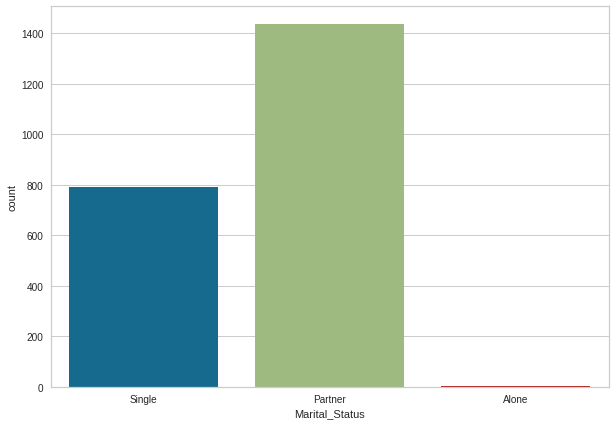

In [55]:
plt.figure(figsize=(10, 7))
sns.countplot(cust_df["Marital_Status"])


* Customers are most likely to be `married` based on their marital status graph.

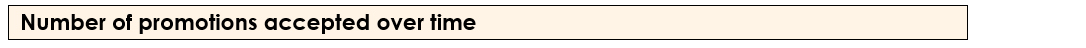

* Define a list of promotions and sums up each promotion's accepted count.
* Printing out the sum of all the promotions that have been accepted by the customer.

In [56]:
accepted_promotions = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

p1 = cust_df["AcceptedCmp1"].sum()
p2 = cust_df["AcceptedCmp2"].sum()
p3 = cust_df["AcceptedCmp3"].sum()
p4 = cust_df["AcceptedCmp4"].sum()
p5 = cust_df["AcceptedCmp5"].sum()
p6 = cust_df["Response"].sum()

no_of_accepted = [p1, p2, p3, p4, p5, p6]


Plot results.

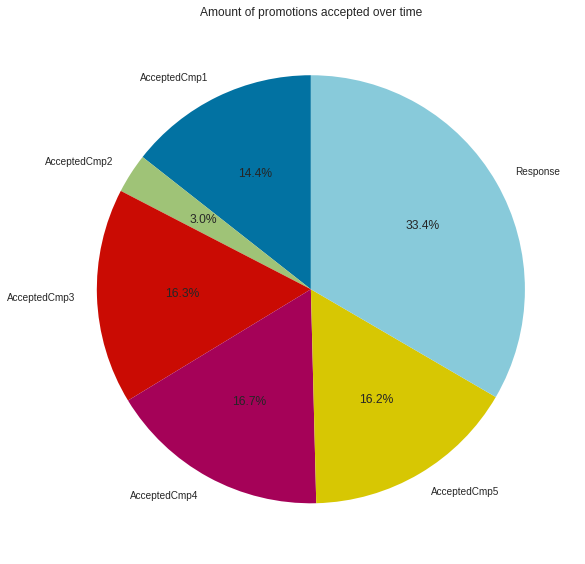

In [57]:
plt.figure(figsize=(10, 8))
plt.pie(no_of_accepted, autopct="%1.1f%%", labels=accepted_promotions, startangle=90)
plt.title("Amount of promotions accepted over time")
plt.tight_layout()
plt.show()


* According to the accepted campaign graph, the number of campaigns a company runs is directly correlated to the number of customers who accept their offers. The response, or the number of customers who accepted the most recent campaign, is given the highest priority.

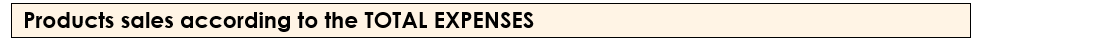

* Creating a list of the expenses in order from highest to lowest.
* Plot it as a bar graph with an `x-axis` for each `expense` category and `y-axis` for `total expenses.`


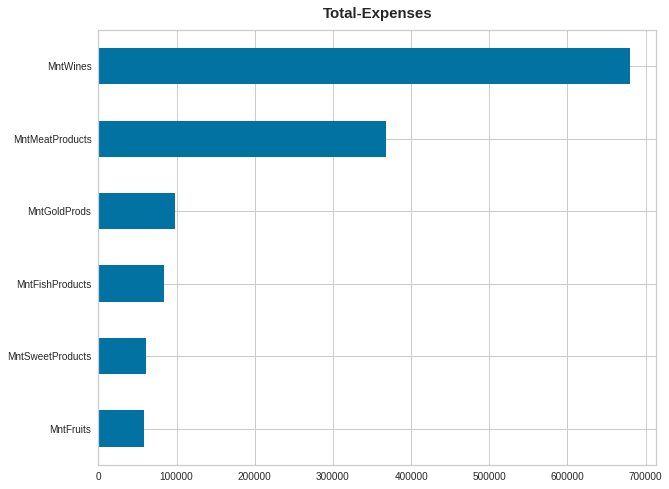

In [58]:
plt.figure(figsize=(10, 8))
ax = (
    cust_df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]
    .sum()
    .sort_values(ascending=True)
    .plot(kind="barh")
)
plt.title("Total-Expenses", pad=12, fontsize=15, fontweight="bold")
plt.show()


A closer look at the total expense graph reveals that `wine` actually has the highest sales volume.

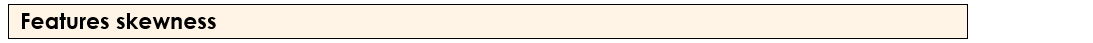

* Iterating through the dataframe, select only the columns that are quantitative and then calculating the `skewness` of each column.
* `Reset the index` on this new DataFrame so that all rows have equal values for features and skew.
* Set up a new dataframe with columns named `"features"` which will contain values for each feature's value as well as its corresponding `skewness value.`
* Plotting a bar graph with the features and skewness values of the DataFrame.

In [59]:
quantitative = cust_df.select_dtypes(["int", "float"]).columns[1:]
skew_features = pd.DataFrame(cust_df[quantitative].apply(lambda sx: skew(sx))).reset_index()
skew_features.columns = ["features", "skewness"]

fig = px.bar(
    skew_features,
    x="features",
    y="skewness",
    color="skewness",
    color_continuous_scale="Teal",
)
fig.show()


* The data is **`highly skewened`** and diverse as it can be observed. As with any dataset, there will always be some customers who conduct a large number of transactions and this is to be expected. We now need to decide whether we want to handle the skewness in our dataset as part of our clustering problem.

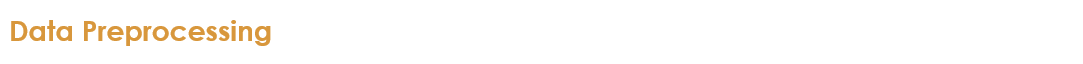

In this section, the process of preprocessing the data to get it ready for the models involves some steps:

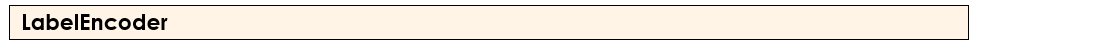

As we have now in our data 1 categorical feature with only `2 possible values`, **`LabelEncoder()`** will be implemented to `transorm` the values to `0` and `1` as follows:

In [60]:
label_encode = LabelEncoder()
for l in ["Marital_Status"]:
    cust_df[l] = cust_df[[l]].apply(label_encode.fit_transform)
    

In [61]:
cust_df.head()


ID     Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  5524      Graduate               2  58138.0        0         0       58   
1  2174      Graduate               2  46344.0        1         1       38   
2  4141      Graduate               1  71613.0        0         0       26   
3  6182      Graduate               1  26646.0        1         0       26   
4  5324  Postgraduate               1  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  Complain  \
0       635         88              546  ...             0         0   
1        11          1                6  ...             0         0   
2       426         49              127  ...             0         0   
3        11          4               20  ...             0         0   
4       173         43              118  ...             0         0   

   Response   Age  Day  Month  Year  Is_Parent  Total_Expenses  Total_Acc_Cmp  
0         1  57.0    9      4  2012          0            1617              1  
1         0  60.0    3      8  2014          1              27              0  
2         0  49.0   21      8  2013          0             776              0  
3         0  30.0    2     10  2014          1              53              0  
4         0  33.0   19      1  2014          1             422              0  

[5 rows x 32 columns]

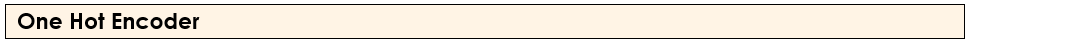

Since the `'Education'` feature can take on one of three possible values, `'one hot encoding'` is the preferred method of encoding it.

In [62]:
hot_enc = pd.get_dummies(cust_df, columns=["Education"])
hot_enc.head()


ID  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524               2  58138.0        0         0       58       635   
1  2174               2  46344.0        1         1       38        11   
2  4141               1  71613.0        0         0       26       426   
3  6182               1  26646.0        1         0       26        11   
4  5324               1  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...   Age  Day  Month  Year  \
0         88              546              172  ...  57.0    9      4  2012   
1          1                6                2  ...  60.0    3      8  2014   
2         49              127              111  ...  49.0   21      8  2013   
3          4               20               10  ...  30.0    2     10  2014   
4         43              118               46  ...  33.0   19      1  2014   

   Is_Parent  Total_Expenses  Total_Acc_Cmp  Education_Graduate  \
0          0            1617              1                   1   
1          1              27              0                   1   
2          0             776              0                   1   
3          1              53              0                   1   
4          1             422              0                   0   

   Education_Postgraduate  Education_Undergraduate  
0                       0                        0  
1                       0                        0  
2                       0                        0  
3                       0                        0  
4                       1                        0  

[5 rows x 34 columns]

Drop unnecessary columns. 

In [63]:
droped_cols = [
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Complain",
    "Response",
]

cust_df = cust_df.drop(droped_cols, axis=1)


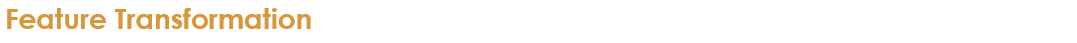

By converting the data within a specific range, we can create high-quality clusters, enhance the precision and accuracy of clustering algorithms and make the mean of the data equal to zero, and the standard deviation equal to one.

Features can differ from one another. Let's take income and age as examples. Ages range from 21 to 90 and income ranges from 65000 to 150000. Due to the fact that distance is calculated in Euclidean and other terms for clustering, it is imperative that all variables have the same range.

* Defining the most important features we will use in our models

In [64]:
sample_data = cust_df[
    [
        "Income",
        "Kidhome",
        "Teenhome",
        "Recency",
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
        "NumDealsPurchases",
        "Web_Purchase",
        "Catalog_Purchase",
        "Store_Purchase",
        "NumWebVisitsMonth",
        "Age",
        "Year",
        "Total_Expenses",
        "Total_Acc_Cmp",
    ]
]

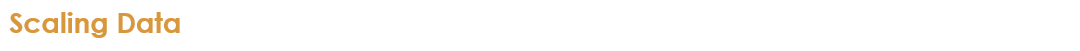

By standardizing variables, we tend to get better results from our training the model processes.

* Scale the data using `StandardScaler()` and fit it on the sample data.

In [65]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(sample_data)

scaled_data = pd.DataFrame(
    scaled_data, index=sample_data.index, columns=sample_data.columns
)
scaled_data


Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.316030 -0.825592 -0.931676  0.307314  0.980166   1.550778   
1    -0.256586  1.031365  0.904492 -0.383771 -0.873191  -0.637618   
2     0.970262 -0.825592 -0.931676 -0.798422  0.359410   0.569773   
3    -1.212954  1.031365 -0.931676 -0.798422 -0.873191  -0.562156   
4     0.323556  1.031365 -0.931676  1.551268 -0.392031   0.418849   
...        ...       ...       ...       ...       ...        ...   
2235  0.465812 -0.825592  0.904492 -0.107337  1.199955   0.418849   
2236  0.601319  2.888322  0.904492  0.238206  0.300008  -0.662772   
2237  0.259856 -0.825592 -0.931676  1.447605  1.791009   0.544619   
2238  0.855292 -0.825592  0.904492 -1.420399  0.365350   0.091848   
2239  0.060212  1.031365  0.904492 -0.314662 -0.656372  -0.587310   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.736151         2.456789          1.472029      0.842690   
1           -0.726371        -0.651738         -0.632996     -0.731824   
2           -0.174584         1.341376         -0.149082     -0.040574   
3           -0.662528        -0.505455         -0.584604     -0.751025   
4           -0.215626         0.152822         -0.003908     -0.559011   
...               ...              ...               ...           ...   
2235         0.076229         0.079680          2.197900      3.895711   
2236        -0.616926        -0.688309         -0.657191     -0.693421   
2237         0.235837        -0.103175         -0.366843     -0.386199   
2238         0.222156         0.774527          0.068679      0.324253   
2239        -0.475559        -0.651738         -0.632996     -0.443803   

      NumDealsPurchases  Web_Purchase  Catalog_Purchase  Store_Purchase  \
0              0.358938      1.405471          2.633984       -0.559160   
1             -0.168815     -1.117198         -0.585437       -1.176175   
2             -0.696567      1.405471         -0.227723        1.291882   
3             -0.168815     -0.756817         -0.943150       -0.559160   
4              1.414444      0.324327          0.129990        0.057854   
...                 ...           ...               ...             ...   
2235          -0.168815      1.765853          0.129990       -0.559160   
2236           2.469949      1.405471         -0.227723       -0.250653   
2237          -0.696567     -0.756817          0.129990        2.217403   
2238          -0.168815      0.684708          0.845417        1.291882   
2239           0.358938     -0.396436         -0.585437       -0.559160   

      NumWebVisitsMonth       Age      Year  Total_Expenses  Total_Acc_Cmp  
0              0.689920  1.015715 -1.500215        1.683247       0.618155  
1             -0.138430  1.272020  1.420291       -0.962795      -0.502974  
2             -0.552605  0.332234 -0.039962        0.283674      -0.502974  
3              0.275745 -1.291031  1.420291       -0.919526      -0.502974  
4             -0.138430 -1.034726  1.420291       -0.305445      -0.502974  
...                 ...       ...       ...             ...            ...  
2235          -0.138430  0.161364 -0.039962        1.223934      -0.502974  
2236           0.689920  1.955500  1.420291       -0.268833       0.618155  
2237           0.275745 -1.034726  1.420291        1.057517       0.618155  
2238          -0.966779  1.101150  1.420291        0.395174      -0.502974  
2239           0.689920  1.272020 -1.500215       -0.721489       0.618155  

[2229 rows x 19 columns]

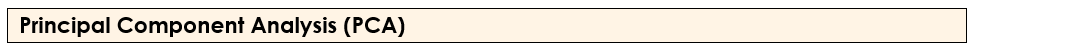

The clustering problem will be more difficult to work with as the number of features increases; processing high-dimensional data will require a great deal of processing power and expense. Therefore, size reduction can occur prior to clustering.

Applyin `PCA`estimator that helps make data sets more manageable, clearer, and more interpretable while minimizing the amount of data that is lost in the process.



The data is already scaled to the range 0 and 1. 

* Apply PCA and trying first to reduce the dataset to 6 dimensions and fit it into the scaled data.

In [66]:
pca = PCA(n_components=6, random_state=42)
pca_fit = pca.fit(scaled_data)


* Create a line plot that shows the `explained variance ratio` of each (PCA). 
* The line is plotted with a red color and marked with asterisks at each data point.
* This plot can be used to assess the role that each principal component plays in the variance of the data, and to select the number of components to use in further analysis.

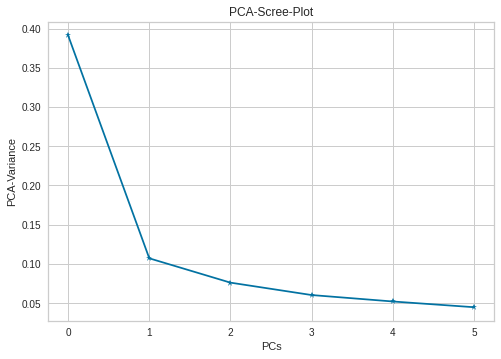

In [67]:
plt.plot(pca.explained_variance_ratio_, color="b", marker="*")
plt.title("PCA-Scree-Plot")
plt.xlabel("PCs")
plt.ylabel("PCA-Variance")
plt.show()


**Insights**
* An ideal point (cutting-off point) that bends at an “elbow” is between 2 and 3.  
* As 80% or more of the variance should be explained by the selected PCs. Our original data will be projected onto a `three-dimensional` subspace and without losing much information, we can discard the rest.
* Among the PCs, PC1 has the most variation, PC2 has the second-most variation, etc.

Implement PCA with a `3 components`, fit it and transofrm it on scaled data and generate a DataFrame that displays the `3 Dimensions`.

In [68]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_df = pd.DataFrame(
    pca.transform(scaled_data), columns=["1st Dimension", "2nd Dimension", "3d Dimension"]
)
pca_df

1st Dimension  2nd Dimension  3d Dimension
0          4.311000       0.427366      1.845435
1         -2.578627      -0.215398     -2.042804
2          1.825443      -0.240516     -0.357932
3         -2.815919      -1.608027      0.262023
4         -0.456606      -0.467533      0.303511
...             ...            ...           ...
2224       2.835566       1.388704      0.333135
2225      -1.362809       2.814027     -0.689370
2226       1.680886      -1.027819     -0.077446
2227       1.969561       0.537279     -2.164045
2228      -1.799279       1.377965      0.120067

[2229 rows x 3 columns]

* Use a `for loop` to iterate over the `"explained_variance_ratio_"` attribute of the PCA object.
* Print the result for each PCA and rounded to two decimal places and multiplies it by 100 to convert it from a fraction to a percentage.

In [69]:
for v in pca.explained_variance_ratio_:
    print("Variation per principal component: {}%".format(round(v * 100, 2)))


Variation per principal component: 39.12%
Variation per principal component: 10.72%
Variation per principal component: 7.62%


`3 components` contribute to about **`58%`** of the total variation in the dataset

Create a subplot to plot the PCAs by using the `add_subplot` as follows:

* The `111 argument` specifies the grid layout of the subplot. In this case, `111` means that the subplot will occupy the first cell in a 1x1 grid.
* The `projection="3d"` argument specifies that the subplot should be created as a `3D plot`. To visualize data in three dimensions.

The scatter method takes a number of arguments, including:
* **`marker`**: the style used to plot the data points. "o" for a circle.
* The size of the data points.
* The color of the data points which is specified to "maroon" color.

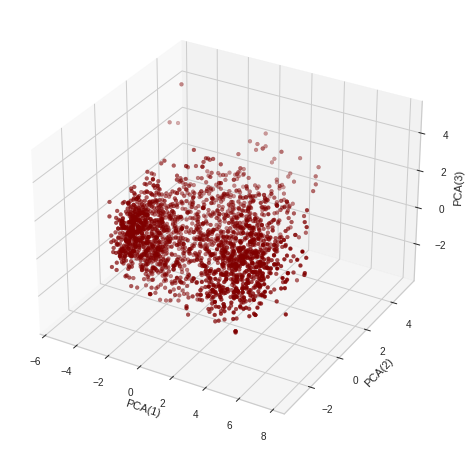

In [70]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    pca_df["1st Dimension"],
    pca_df["2nd Dimension"],
    pca_df["3d Dimension"],
    c="maroon",
    cmap="Set2_r",
    s=15,
    marker="o",
)
ax.set_xlabel("PCA(1)")
ax.set_ylabel("PCA(2)")
ax.set_zlabel("PCA(3)")
plt.show()


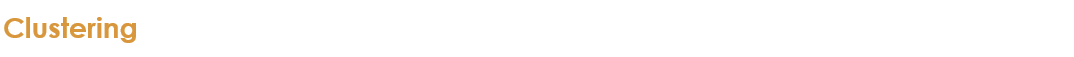

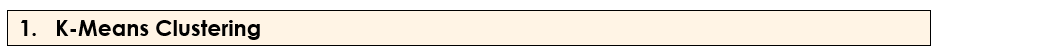

Procedures for Cluster Analysis

* The `Elbow Method`: along with the elbow method and visualizer (KElbowVisualizer), they can be used to determine the optimum size of a set of clusters (k).

* A clustering process that uses four different kinds of clustering algorithms

* Analyzing and evaluating each algorithm to determine the most effective one

### Elbow Method 

Identifying clusters requires determining the initial number of clusters. Due to the fact that we do not know the number of clusters that should be used, we will use the `Elbow method`, which involves defining a "list" for the sum of the square distance that separates each datapoint from its nearest cluster center.

* Implement a `loop` for each K in a range starting with `2 and ending with 14` to find the optimal K value. 
* Use `kmeans` for the `KMeans model` by calling the the KMeans model and define the `n_clusters` equals to the number of defined Ks, in addition to use the intilization method for the centroids by set it to the efficient approach default value to `k-means++`, when used for k-mean clustering, selects initial cluster centers in an intelligent way to accelerate the convergence process.
* Store the model inertia for each K and plot the Elbow method. 

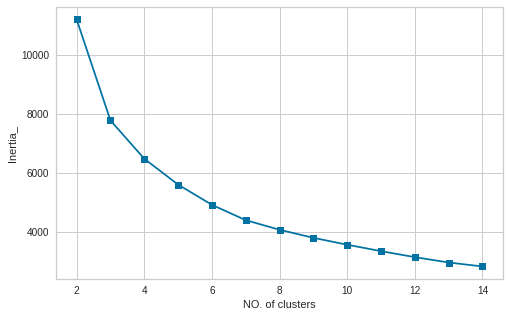

In [71]:
distortions_score = []

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(pca_df)
    distortions_score.append(km.inertia_)

km_df = pd.DataFrame({"KM-Cluster": range(2, 15), "Score": distortions_score})

plt.figure(figsize=(8, 5))
plt.plot(km_df["KM-Cluster"], km_df["Score"], marker="s")
plt.xlabel("NO. of clusters")
plt.ylabel("Inertia_")
plt.show()


**Insights**

* Assuming **`K=5 or K=6`** would be the best option. 

To find the best value for K in clustering algorithms for K-Means, we can use the two visualizers provided by the "yellow brick library." as follows:

* Create `KElbowVisualizer instance` and pass the model in addition to the number of Ks, in our case for a range from 2 to 14.
* Fit the visualizer using fit() and then display it with show()

Using this methodology, elbow-shaped line plots are interpreted. Clusters are counted when the elbow bends and fitting time per K is also displayed in the KElbowVisualizer.

`x-axis`illustrates the **`clusters`**, while the `y-axis` displays each point's **`squared distance to its assigned center`**.
Use `'KelbowVisualizer' method`, `fit` it to the dataset, then `plot` it for improved observation.

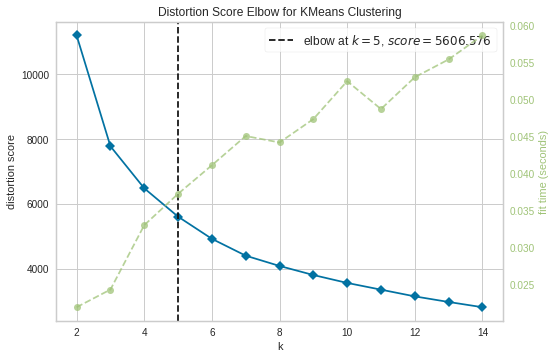

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
elbow_visualizer = KElbowVisualizer(KMeans(), k=(2, 15))
elbow_visualizer.fit(pca_df)
elbow_visualizer.show()


**Elbow method showed the best K value is `K=5`.**

Calculate the `'Silhouette Score'` for each value of K in order to evaluate precision with which similar samples are grouped together.


In [73]:
for k in range(2, 15):
    km_labls = KMeans(n_clusters=k, random_state=123, max_iter=1000).fit_predict(pca_df)
    print(
        "The silhouette score for a model with {} clusters is: {}".format(
            k,
            metrics.silhouette_score(pca_df, km_labls, metric="euclidean").round(4),
        )
    )


The silhouette score for a model with 2 clusters is: 0.4719
The silhouette score for a model with 3 clusters is: 0.4123
The silhouette score for a model with 4 clusters is: 0.3475
The silhouette score for a model with 5 clusters is: 0.334
The silhouette score for a model with 6 clusters is: 0.326
The silhouette score for a model with 7 clusters is: 0.3135
The silhouette score for a model with 8 clusters is: 0.3016
The silhouette score for a model with 9 clusters is: 0.303
The silhouette score for a model with 10 clusters is: 0.2895
The silhouette score for a model with 11 clusters is: 0.2819
The silhouette score for a model with 12 clusters is: 0.2808
The silhouette score for a model with 13 clusters is: 0.28
The silhouette score for a model with 14 clusters is: 0.2795


Scores for silhouettes range from -1 to 1. When the value is relatively close to **number 1`**, it indicates that the cluster is well separated from other clusters and it considered to be the best cluster, so we can see from the above scheme that **`K = 2`** is the best value.

Analyze the silhouette scores to determine the optimal number of clusters by finding the **`"silhouette coefficients"`** in a foor loop with the same range of Ks.


In [74]:
silhouette_coefficients = []

for ks in range(2, 15):
    s_kmeans = KMeans(n_clusters=ks, init="k-means++", random_state=123, max_iter=1000)
    s_kmeans.fit(pca_df)
    score = silhouette_score(pca_df, s_kmeans.labels_)
    silhouette_coefficients.append(score)


Plot results

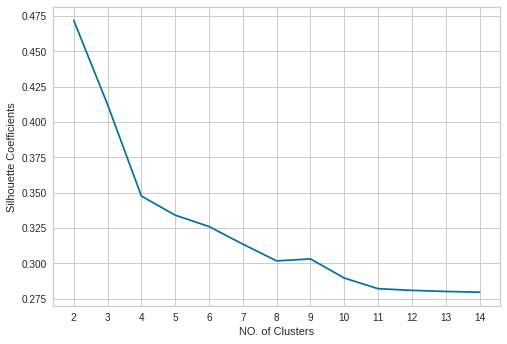

In [75]:
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("NO. of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()


Using the aforementioned Silhouette graph as a guide:

* Train the `K-Means clustering algorithm` with `2 clusters` and a maximum number of iterations of `1000`.
* Fit the model on the `PCA dataframe` and then `predict` the labels of each sample.


In [76]:
km = KMeans(n_clusters=2, init="k-means++", max_iter=1000, random_state=123)

y_m = km.fit_predict(pca_df)
y_m


array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

Utilizing the `assign()` method to append a column to the current data frame that contains `model labels.`

In [77]:
pca_df = pca_df.assign(ClusterLabel=km.labels_)
pca_df


1st Dimension  2nd Dimension  3d Dimension  ClusterLabel
0          4.311000       0.427366      1.845435             0
1         -2.578627      -0.215398     -2.042804             1
2          1.825443      -0.240516     -0.357932             0
3         -2.815919      -1.608027      0.262023             1
4         -0.456606      -0.467533      0.303511             1
...             ...            ...           ...           ...
2224       2.835566       1.388704      0.333135             0
2225      -1.362809       2.814027     -0.689370             1
2226       1.680886      -1.027819     -0.077446             0
2227       1.969561       0.537279     -2.164045             0
2228      -1.799279       1.377965      0.120067             1

[2229 rows x 4 columns]

Employ a scatter plot to display the clusters and their centers.

* Set the plot's dimensions.

* **`Cluster 0`** will contain all the customer rows, so we must first pass our data frame "scaled data," through the `iloc` method to select the rows and columns we need `(first cluster)`. Therefore, select all rows that fall into the first cluster and pass `y_m` where it is equal to '0' on the 'x-axis' to the 'y-axis' column '1'.

* Set the size of the point to properly visualize it.

* Set the color of the data points. 

* Set labels according to the number of clusters. 

* Display cluster centroid using kmeans attribute `cluster_centers` with all the rows and column 0. and on the other side, all the rows, column 1. 

* Set the size and color for the centroids.

Ceating a scatter plot and coloring the points based on the labels stored in the `y_m array`.

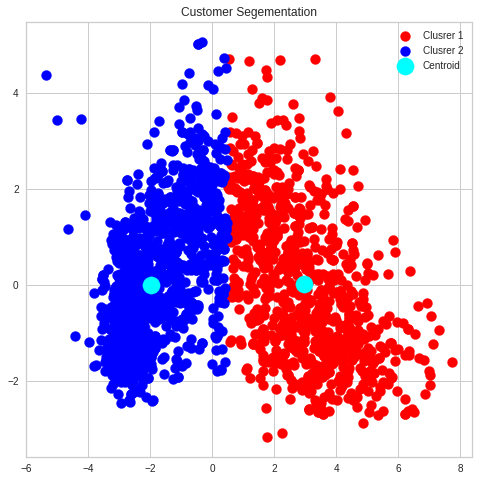

In [78]:
plt.figure(figsize=(8, 8))
plt.scatter(
    pca_df.iloc[y_m == 0, 0],
    pca_df.iloc[y_m == 0, 1],
    s=100,
    c="red",
    label="Clusrer 1",
)
plt.scatter(
    pca_df.iloc[y_m == 1, 0],
    pca_df.iloc[y_m == 1, 1],
    s=100,
    c="blue",
    label="Clusrer 2",
)


plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=300,
    c="cyan",
    label="Centroid",
)

plt.title("Customer Segementation")
plt.legend()
plt.show()


Now, Customers are segmented into **two different groups.** 

**Examining the quality of the KMean clustering model using the following metrics:**

* Calculating the **`Silhouette Score`**: The closer the silhouette coefficients are to a value of one, the greater the distance that separates the samples in one cluster from those in neighboring clusters. This distance is an indication of more effective clustering.

* Calculating **`Calinski-Harabasz Score`**: The higher the score, the better the performance.

* Calculating **`Davies-Bouldin Score`**: The similarity between two groups is measured by comparing their average distances within and between clusters. As scores get closer to zero, they become more indicative of tightly clustered data.

In [79]:
kms_silhouette_sc = silhouette_score(pca_df, km.labels_, metric="euclidean")
kms_calinski_sc = calinski_harabasz_score(pca_df, km.labels_)
kms_davies_sc = davies_bouldin_score(pca_df, y_m)

print("K-Means Silhouette-Score: %.4f" % kms_silhouette_sc)
print("K-Means Calinski-Harabasz Score: %.4f" % kms_calinski_sc)
print("K-Means Davies-Bouldin Score: %.4f" % kms_davies_sc)


K-Means Silhouette-Score: 0.4826
K-Means Calinski-Harabasz Score: 2716.3737
K-Means Davies-Bouldin Score: 0.8354


* Kmeans Clustering achieve an average `Silhouette Score of 0.4826`.

* Kmeans Clustering achieve an average `Calinski Harabasz Score of 2716`.

* Kmeans Clustering achieve an average `Davies Bouldin Score of 0.8353`.


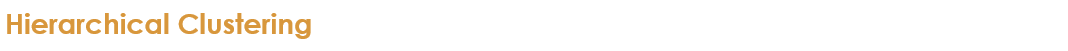

Using a tree-like structure, hierarchical clustering attempts to organize data into logical groups. With this model, we can use a `dendogram ` to count clusters and calculate the n clusters.

* Dendrograms are utilized to separate a single cluster into multiple clusters.

* Use the `SciPy library` and a `linkage function` to create a visual representation of the dendogram; this is a necessary step in the process of performing a hierarchical cluster analysis, as the linkage value measures distance between clusters. In addition to use the `'ward'` method as the default. It does not directly measure the distance, but rather analyzes the variance of the clusters, which makes it the method that is best suited for quantitative variables.


### Dendrogram 

* Use `"dendrogram"` function from the `scipy.cluster.hierarchy (shc)` library to create the dendrogram.
* Specifies the `"linkage" method` to be used for the hierarchical clustering to `"ward"` linkage method that minimizes the variance within each cluster.


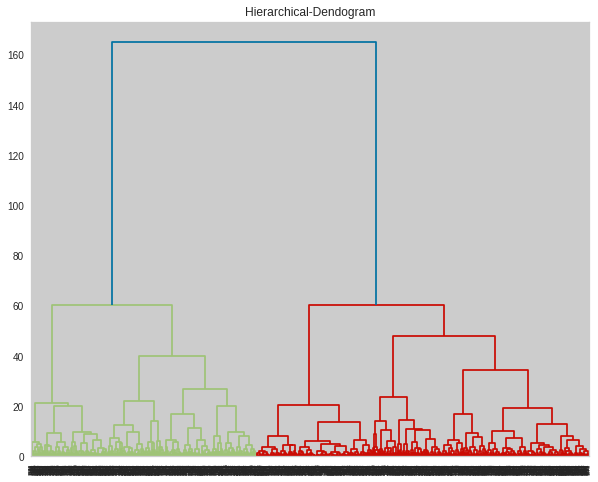

In [80]:
plt.figure(figsize=(10, 8))
plt.title("Hierarchical-Dendogram")
dend = shc.dendrogram(shc.linkage(pca_df, method="ward"))


As in the graph, the `'y-axis'` represents `distance`, and vertical lines represent the distances between data points. where the `x-axis represents` the samples. Consequently, the further down the tree the data points are grouped, the smaller the distance between them. A horizontal line joining two vertical lines indicates a connection between two clusters.

**Insights**

* According to the dendrogram that was just presented, clusters numbers will be determined based on the amount of vertical lines that intersect with horizontal lines at the point where the blue line, which represents the largest vertical difference between nodes, passes through a horizontal line. Therefore, a threshold of 110 can be chosen and the dendrogram can be cut. The optimal number of clusters in our case is **`two clusters.`**

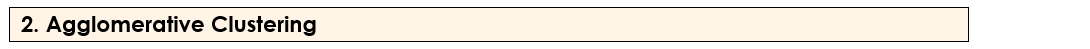

`Agglomerative Clustering` is the type of hierarchical clustering that is used the most frequently, objects are grouped into clusters according to the similarity of the objects in each cluster.

* Using the default method `'distortion'` which calculates each point's squared distance from its designated center,construct and display the various clustering evaluation metrics for different values of k to determine the best value. 

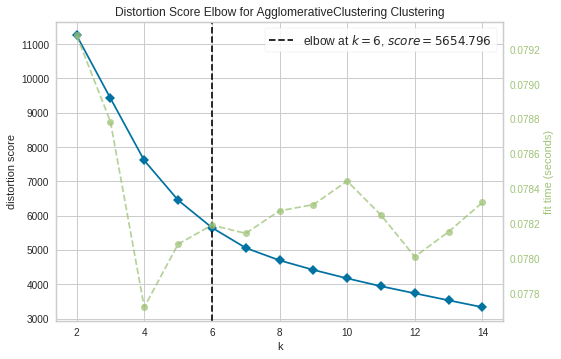

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
agg_model = AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_model, k=(2, 15), timings=True)
visualizer.fit(pca_df)
visualizer.show()
  

**Insights**

Distortion score elbow for AgglomerativeClustering reveals that the optimal cluster size was **`K=6`** with a score of **`6425`**.

* Let us find the `Silhouette Score for AgglomerativeClustering`as follows:

* Create the `Agglomerative clustering model`.

* Use `KElbowVisualizer` to implement the "elbow" method by fitting the model with different K values and using the method `silhouette` to calculate the mean silhouette coefficient of every sample. Display the amount of time it will take to train the clustering model per K as a dashed orange line and turn off the feature of automatically finding the elbow. 

* Creating a new dataframe that has the values of all range of Ks and add them to a new column.

* Add the score for each K into the dataframe.

* Find the `maximum score` and save it in a new data frame and print it as list index. 


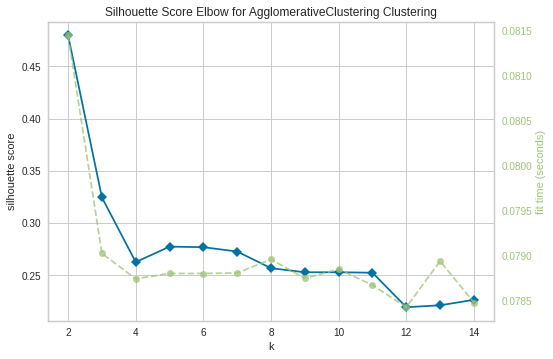

No. of clusters according to silhouette-score: [2]


In [82]:
Agg_model = AgglomerativeClustering()

visualizer = KElbowVisualizer(
    Agg_model, k=(2, 15), metric="silhouette", timings=True, locate_elbow=False
)
visualizer.fit(pca_df)
visualizer.show()

agg_df = pd.DataFrame(visualizer.k_values_, columns=["Vcenters"])
agg_df["scores"] = visualizer.k_scores_
df2 = agg_df[agg_df.scores == agg_df.scores.max()]
print("No. of clusters according to silhouette-score:", df2["Vcenters"].tolist())


The **`silhouette score`** for this clustering algorithm indicates that the optimal `K to implement is 2`.

* Follow the same procedures for finding best K using `calinski_harabasz` score. 

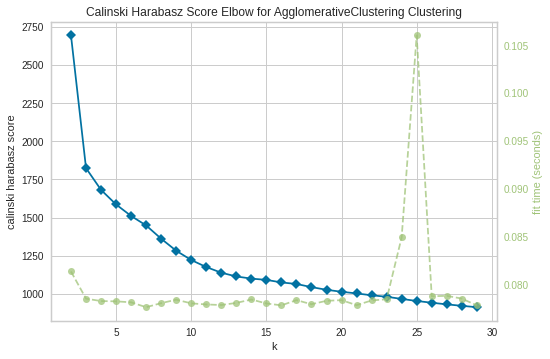

Optimal No. of clusters according to Calinski Harabasz score: [2]


In [83]:
Agg_model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    Agg_model, k=(2, 30), metric="calinski_harabasz", timings=True, locate_elbow=False
)
visualizer.fit(pca_df)
visualizer.show()


agg_df = pd.DataFrame(visualizer.k_values_, columns=["Vcenters"])
agg_df["scores"] = visualizer.k_scores_
df2 = agg_df[agg_df.scores == agg_df.scores.max()]
print(
    "Optimal No. of clusters according to Calinski Harabasz score:",
    df2["Vcenters"].tolist(),
)


* Determine the Davies Bouldin score to return the Agglomerative clustering score for Davies Bouldin points to centers.

* Define a function and pass the dataset that we will fit the clustering algorithm to and the clusters number we want (K values) and return `Davies Bouldin score`.


In [84]:
def get_AG_clustering_score(data, centers):

    AG_clustering = AgglomerativeClustering(n_clusters=centers)
    model = AG_clustering.fit_predict(pca_df)
    m_score = davies_bouldin_score(pca_df, model)
    
    return m_score


No. of clusters according on DB score: [2]


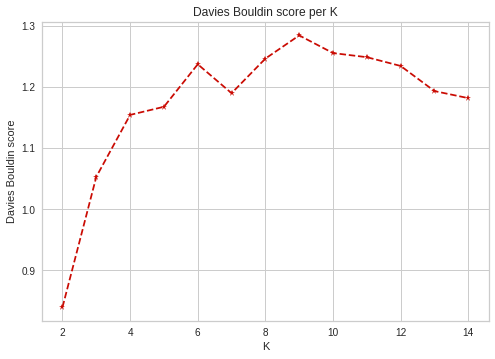

In [85]:
scores = []
ag_centers = list(range(2,15))

for c in ag_centers:
    scores.append(get_AG_clustering_score(pca_df, c))
    
plt.plot(ag_centers, scores, linestyle='--', marker='*', color='r');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score per K');


data = pd.DataFrame(ag_centers,columns=['centers'])
data['scores'] = scores
df2 = data[data.scores == data.scores.min()]
print('No. of clusters according on DB score:', df2['centers'].tolist())


The model can be trained and fitted using just **`two clusters`**, yielding final score results.

In [86]:
model = AgglomerativeClustering(n_clusters=2)
y_agg = model.fit(pca_df)
y_agg_pred = model.fit_predict(pca_df)


 Calculate `cluster validation metrics` for the Agglomerative Clustering


In [87]:
AG_clustering_sil = silhouette_score(pca_df, y_agg.labels_, metric="euclidean")
AG_clustering_cal = calinski_harabasz_score(pca_df, y_agg.labels_)
AG_clustering_dav = davies_bouldin_score(pca_df, y_agg_pred)

print("AGclustering Silhouette-Score: %.4f" % AG_clustering_sil)
print("AGclustering Calinski-Harabasz-Score: %.4f" % AG_clustering_cal)
print("AGclustering Davies-Bouldin-Score: %.4f" % AG_clustering_dav)


AGclustering Silhouette-Score: 0.4796
AGclustering Calinski-Harabasz-Score: 2693.6183
AGclustering Davies-Bouldin-Score: 0.8397


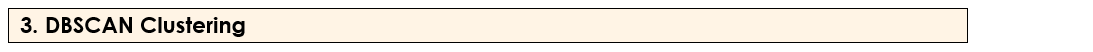

DBSCAN, is a density-based clustering algorithm. The density of a cluster is the degree to which its members are combined together. Additionally, it performs well with data that contains groups of elements that have the same density.

DBSCAN algorithm group points based on distance measurement and has two main parameters:

* **`Epsilon`** : Basically, this is how far two points must be apart for them to be considered neighbors. as a result, Eps is used as a criterion for two points that are adjacent.

* **`Min Samples`**: If the No. of data points is more than or equal to the min sample, then it is considered sufficient to build a cluster.

* First, it is necessary for us to select two determinants: `epsilon`and `minPoints.`


* Perform a `Grid Search` to find the optimal parameters for a DBSCAN clustering algorithm.
* Perform a `nested loop` to iterate over a range of values for the `"eps"` and `"min_samples"`.
* For each combination of values, apply the DBSCAN algorithm to the `(pca_df)` and assigns the data points to clusters.
* Check if the number of unique clusters is greater than 2, and if so, appends the parameter values, the number of clusters, and the Silhouette and Davies-Bouldin scores to `(dbscan_param).`
* Set the `ignore_index` to `True`, so index labels of the new rows will be ignored, and the rows will be added to the DataFrame with new, sequential index labels.

Use this to contrast the performance of the DBSCAN algorithm with different parameter values, and to select the optimal parameter values for further analysis.

**`"eps" parameter` multiplied by `0.2` in order to adjust the scale of the parameter to convert it from some other unit of measurement to the units of the data. This allows the DBSCAN algorithm to be applied to the data with the correct scale for the "eps" parameter, which can affect the performance of the algorithm and the quality of the resulting clusters.**

In [88]:
dbscan_param = pd.DataFrame(
    columns=["eps", "minimum_samples", "No. of clusters", "Silhouette-Score"]
)

for eps in range(2, 15):
    for m in range(2, 15):
        db_cluster = DBSCAN(eps=eps * 0.2, min_samples=m)
        clusters = db_cluster.fit_predict(pca_df)
        if len(np.unique(clusters)) > 2:
            dbscan_param = dbscan_param.append(
                {
                    "eps": eps * 0.2,
                    "minimum_samples": m,
                    "No. of clusters": len(np.unique(clusters)),
                    "Silhouette-Score": metrics.silhouette_score(pca_df, clusters),
                    "Davies Bouldin Score": metrics.davies_bouldin_score(
                        pca_df, clusters
                    ),
                },
                ignore_index=True,
            )


Sort the scores according to Silhouette Score, and return the `top ten` scores.

In [89]:
dbscan_param.sort_values("Silhouette-Score", ascending=False)[:10]


eps  minimum_samples  No. of clusters  Silhouette-Score  \
45  1.0              9.0              3.0          0.460667   
44  1.0              8.0              3.0          0.459969   
46  1.0             10.0              3.0          0.459553   
47  1.0             11.0              3.0          0.454807   
48  1.0             12.0              3.0          0.450934   
49  1.0             13.0              3.0          0.448756   
50  1.0             14.0              3.0          0.447473   
29  0.8              6.0              3.0          0.443878   
28  0.8              5.0              3.0          0.443781   
30  0.8              7.0              3.0          0.437403   

    Davies Bouldin Score  
45              1.603448  
44              1.538734  
46              1.598797  
47              1.749715  
48              1.761685  
49              1.758383  
50              1.701615  
29              2.271563  
28              2.050058  
30              2.543194

 * Creating the `DBSCAN model` and setting up a cluster with an `eps of 1` and a `min_samples of 9` based on the last result.
 * Fits the model using the `fit_predict function`.
 * Calculate the `cluster labels` and add them to the dataframe.

In [90]:
dbscan_cluster = DBSCAN(eps=1, min_samples=9)
pred_cluster_dbscan = dbscan_cluster.fit_predict(pca_df)
dbscan_cluster_labels = dbscan_cluster.labels_
pca_df["Clusters_dbscan"] = pred_cluster_dbscan


Determine the silhouette, calinski harabasz, and davies bouldin scores.

In [91]:
db_silh_sc = silhouette_score(pca_df, pred_cluster_dbscan, metric="euclidean")
db_caln_sc = calinski_harabasz_score(pca_df, pred_cluster_dbscan)
db_davi_sc = davies_bouldin_score(pca_df, pred_cluster_dbscan)

print("DBSCAN Silhouette-Score: %.4f" % db_silh_sc)
print("DBSCAN Calinski-Harabasz-Score: %.4f" % db_caln_sc)
print("DBSCAN Davies-Bouldin-Score: %.4f" % db_davi_sc)


DBSCAN Silhouette-Score: 0.4752
DBSCAN Calinski-Harabasz-Score: 1442.0147
DBSCAN Davies-Bouldin-Score: 1.5211


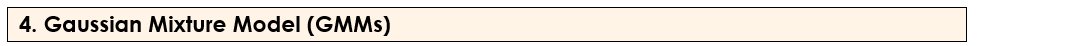

In the Gaussian Mixture Models (GMMs), each cluster is modeled as a collection of Gaussian distributions. This means that a Gaussian Mixture Model has a bias toward grouping data points that correspond to the same distribution together.

In the first step, `n clusters` must be determined. The best value for the `'clusters (k)'` parameter is the number that produces the smallest Akaike or Bayesian information criterion `(AIC or BIC)`.

Do the same as the previous procedures to for this model.

In [92]:
model_params = ["spherical", "tied", "full", "diag"]

cluster_no = np.arange(2, 15)
param_results = pd.DataFrame(
    columns=[
        "Covariance",
        "Cluster_No",
        "Silhouette-Score",
        "Davies-Bouldin-Score",
    ]
)

for p in model_params:
    for cn in cluster_no:
        gm_model = GaussianMixture(
            n_components=cn, covariance_type=p, random_state=123
        )
        modeled_clusters = gm_model.fit_predict(pca_df)
        if len(np.unique(modeled_clusters)) >= 2:
            param_results = param_results.append(
                {
                    "Covariance": p,
                    "Cluster_No": cn,
                    "Silhouette-Score": metrics.silhouette_score(pca_df, modeled_clusters),
                    "Davies-Bouldin-Score": metrics.davies_bouldin_score(
                        pca_df, modeled_clusters
                    ),
                },
                ignore_index=True,
            )


Display results 

In [93]:
display(param_results.sort_values(by=["Silhouette-Score"], ascending=False)[:5])


Covariance Cluster_No  Silhouette-Score  Davies-Bouldin-Score
26       full          2          0.491449              0.821222
13       tied          2          0.491449              0.821222
39       diag          2          0.491449              0.821222
0   spherical          2          0.482567              0.841079
40       diag          3          0.475193              1.521065

**Insights**

* The most ideal number of clusters to use in `2` with the highest silhouette score and least davies bouldin score, with the type either (full, tied or diag). 

* Thus, Train the model with `2 components` and ` a covariance_type of "full".`, fit the model and predict the labels for the datapoints.

In [94]:
GMM_model = GaussianMixture(n_components=2, covariance_type="full", random_state=123)
GMM_model.fit(pca_df)
GMM_lbls = GMM_model.predict(pca_df)
centers = GMM_model.means_


Check the scores for the GMM model.

In [95]:
gm_sil = silhouette_score(pca_df, GMM_lbls, metric="euclidean")
gm_cal= calinski_harabasz_score(pca_df, GMM_lbls)
gm_dav = davies_bouldin_score(pca_df, GMM_lbls)

print("GaussianMixture Silhouette-Score: %.4f" % gm_sil)
print("GaussianMixture Calinski-Harabasz-Score: %.4f" % gm_cal)
print("GaussianMixture Davies-Bouldin-Score: %.4f" % gm_dav)


GaussianMixture Silhouette-Score: 0.4914
GaussianMixture Calinski-Harabasz-Score: 2799.1399
GaussianMixture Davies-Bouldin-Score: 0.8212


Train the model with other covariance type to double check the scores.

In [96]:
gm_model_2 = GaussianMixture(
    n_components=2, covariance_type="tied", random_state=123
)
gm_model_2.fit(pca_df)
gmm_lbls_2 = gm_model_2.predict(pca_df)


In [97]:
gm_cluster_2_s = silhouette_score(pca_df, gmm_lbls_2, metric='euclidean')
gm_cluster_2_c = calinski_harabasz_score(pca_df, gmm_lbls_2)
gm_cluster_2_d = davies_bouldin_score(pca_df, gmm_lbls_2)

print('Silhouette-Score: %.4f' % gm_cluster_2_s)
print('Calinski-Harabasz-Score: %.4f' % gm_cluster_2_c)
print('Davies-Bouldin-Score: %.4f' % gm_cluster_2_d)


Silhouette-Score: 0.4914
Calinski-Harabasz-Score: 2799.1399
Davies-Bouldin-Score: 0.8212


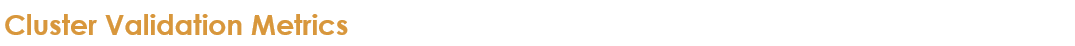

* Create an empty data frame, iterates through each of the algorithms to create another dataframe for the score of each one and choose the one with the `highest` **`Silhouette Score`**, **`Calinski Harabasz Score`** and `least` **`Davies Bouldin Score.`**

In [98]:
sil_score_df = pd.DataFrame(
    [
        [
            "Agglomerative Clustering",
            AG_clustering_sil,
            AG_clustering_cal,
            AG_clustering_dav,
        ],
        ["KMeans", kms_silhouette_sc , kms_calinski_sc , kms_davies_sc],
        ["DBSCAN ", db_silh_sc, db_caln_sc, db_davi_sc],
        ["GMM ", gm_sil, gm_cal, gm_dav],
    ],
    columns=[
        "Algorithm",
        "Silhouette-Score",
        "Calinski-Harabasz-Score",
        "Davies-Bouldin-Score",
    ],
)
sil_score_df



Algorithm  Silhouette-Score  Calinski-Harabasz-Score  \
0  Agglomerative Clustering          0.479583              2693.618304   
1                    KMeans          0.482556              2716.373667   
2                   DBSCAN           0.475193              1442.014700   
3                      GMM           0.491449              2799.139911   

   Davies-Bouldin-Score  
0              0.839734  
1              0.835360  
2              1.521065  
3              0.821222

We have finally tried four algorithms. GMM possesses the highest scores for Silhouette, Calinski Harabasz, and Davies Bouldin. Therefore, the GMM Algorithm is better suited for customer segmentation.

Calculate the number of customers in each cluster after applying a Gaussian mixture model (GMM) to a dataset. This table can be used to understand the distribution of customers across the different clusters, and to identify any clusters that are particularly large or small.

In [99]:
cust_df["finalClusters"] = list(GMM_lbls)
customers = pd.DataFrame(cust_df["finalClusters"].value_counts()).rename(
    columns={"finalClusters": "Number of Customers"}
)
customers.T

1    0
Number of Customers  1337  892

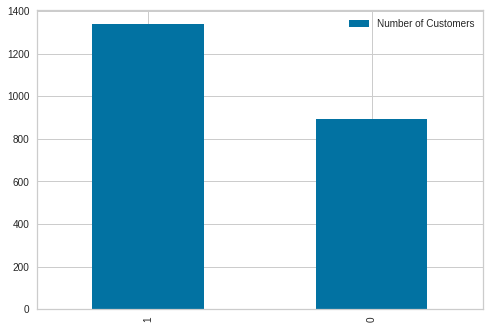

In [100]:
customers.plot(kind='bar')
plt.show()

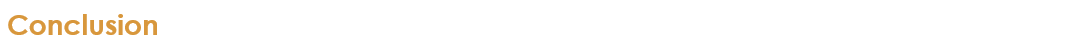

An analysis of customer personalities and segments in this work is conducted using unsupervised learning. Conducting this type of analysis can be extremely helpful for marketers to determine which customers are most important to them, and which customers require special campaigns or attention to turn into loyal ones. As a result, market department and other departments can be more efficient with their time, money, and resources.

We evaluated four different clustering models and we found that **K = 2** is the optimal value for this parameter by implementing **Gaussian Mixture Modelling algorithm**.This model has several useful properties, including analyzing data features to identify complex relationships and to handle data that may be incomplete or noisy.
However, The main feature of this model is that it can be used to identify clusters within a dataset. This is because the model assumes that each cluster is generated from a separate Gaussian distribution, and it can estimate the parameters of these distributions based on the data. This allows the model to accurately identify clusters and to assign each data point to the cluster that it is most likely to belong to.

Another useful feature, it can handle data that is not linearly separable. This allows the model to identify complex patterns in the data that may not be easily detectable using other methods. Additionally, a Gaussian mixture model is flexible and can be easily adapted to different types of data. It can handle continuous, discrete, and mixed data types, and it can be extended to incorporate additional information about the data, such as prior knowledge or constraints. This makes it a versatile tool for data analysis and modeling.

Since Gaussian Mixture Modelling algorithm assigns a probability to each point to belong to a certain cluster, it is much more adaptable in terms of cluster covariance depending on the selected model. In addition, its covariance structure implies that 
GMM permits cluster membership is mixed among points.. On the other hand, one limitation for the mentioned model that each observation is generated by a single latent variable that could be considered as hidden parameter and multiple variables are usually involved.

Customers were divided into two groups based on their **spending, income, age, and the products they purchased as well as their purchase methods**. We found different customer segments who have similar needs to solve the problem of two clusters, so that the company could learn more about its customers and tailor its services accordingly. Additionally, we can assist the firm by identifying products that share similar customer attributes that can lead to cross-sell or up-sell opportunities. Regarding segmented clusters, **1337 customers** make up **cluster 1**, which has the highest concentration of customers. Compared to cluster 2, **cluster 2** has the fewest customers, with only **891 customers**. This will give the company the ability to grow by focusing on specific segments with the right products and services and set more personalized approach that could lead to the right marketing ideas, growth, and profits.

**Recommendations:**

Following the previous work, and depending on the evaluation of the various segments, a decision has to be made about which segment to serve. The following factors should be considered when evaluating segments:

Moreover, there are several options available to the company:

**1. A company's primary concern should not only be their sales volume, but also the growth potential of the segment as a whole.**

**2. The company's main objective should be to provide specialized services for distinct markets.**

**3. Investing limited resources in a single segment.**

**4. Assess the number and type of segments to include in the analysis and determine how many segments to target.**

For the marketing department to understand each segment more clearly, each segment must be profiled after the segments have been defined. When profiling the two segments, the following types of variables could be considered:

* **Consumption patterns vary by segment? Is there a difference in the types and quantities of products consumed by different segments**
* **How sensitive are certain segments to price changes?**
* **In terms of which variables do the groups differ most?**
 
Segmentation goals and variables need to be broken down into manageable tasks once a company has a clear picture of them. These tasks need to be prioritized now. By arranging the largest segments first, it will then be possible to leverage large groups of customers immediately. Alternatively, segments can be ranked according to their performance, such as the amount spent. As soon as the order is set, the tasks will be set up.

Overall, the strengths of customer segmentation include the ability to better understand and serve customers, improve customer satisfaction, and increase sales. It also allows the company to tailor their marketing and sales efforts to different groups of customers, which can help to improve the effectiveness of these efforts.

However, there are also some limitations to customer segmentation. One of the main limitations is that it can be time-consuming and resource-intensive to collect and analyze customer data. Additionally, the accuracy of the segmentation may be limited by the quality and completeness of the data. Finally, customer segmentation does not guarantee success, as other factors, such as market conditions and competition, can also impact a business's ability to increase sales and loyal customers.

**Data-driven recommendations**

**1. Utilizing customer feedback:** Gathering and analyzing customer feedback can provide valuable insights into what customers want and how to improve the customer experience. This can help businesses to identify areas for improvement and to make changes that will increase customer satisfaction and loyalty.

**2. Developing customer loyalty programs:** these kinds of rewards programs can be a successful way of boosting customer loyalty and increasing sales as it can offer rewards, such as discounts or free products, to customers who make regular purchases or refer others to the business.

**3. Using customer data,** businesses can personalize the customer experience by providing tailored recommendations, promotions, and other offers. This can help to increase customer satisfaction and loyalty, as well as sales.

The bias-variance trade-off is a fundamental concept in statistics and machine learning, and it can also impact customer segmentation. In general, the bias-variance trade-off refers to the data fit versus simplicity of a model.

In customer segmentation, a model with high bias may make overly simplified assumptions about the data, resulting in poor segmentation. On the other hand, a model with high variance may overfit the data, resulting in segments that are too specific and may not generalize well to new data.

This can be avoided by following the following steps, it is important to carefully balance the bias and variance of the model used for customer segmentation. This can be done by using regularization techniques, such as adding constraints to the model, or by using cross-validation to select the model that performs best on a held-out test set. By striking the right balance between bias and variance, the company can ensure that their customer segmentation is effective and reliable.

